In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

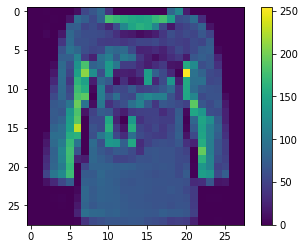

In [8]:
plt.figure()
plt.imshow(train_images[1110])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6266 - accuracy: 0.7876
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3888 - accuracy: 0.8597
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3453 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3196 - accuracy: 0.8817
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2897 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2847 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2557 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8813
Test accuracy: 0.8812999725341797


In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([3.8082584e-07, 6.2716083e-08, 1.5845489e-09, 7.4239588e-09,
       2.5999705e-07, 2.6769377e-04, 3.9894297e-07, 1.9785071e-02,
       9.7555066e-08, 9.7994596e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

Pick a number: 
Try again...
Pick a number: 
Try again...
Pick a number: 23


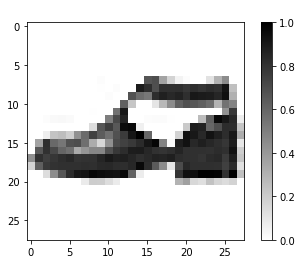

In [21]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
